In [36]:
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.regularizers import l1_l2
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, LeakyReLU
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

In [37]:
# Suponiendo que 'df' es tu DataFrame
df = pd.read_csv('df_merged.csv', index_col='Fecha_venta', parse_dates=True)

In [38]:
df_completo = df

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 113254 entries, 2021-05-08 to 2024-04-30
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ID_tienda         113254 non-null  int64  
 1   ID_producto       113254 non-null  int64  
 2   Cant_vendidas     113254 non-null  int64  
 3   Facturacion       113254 non-null  float64
 4   Precio_unidad     113254 non-null  float64
 5   Dia_sem           113254 non-null  object 
 6   Status            113254 non-null  int64  
 7   ID_proveedor      113254 non-null  int64  
 8   Categoria         113254 non-null  int64  
 9   Clasif_proveedor  113254 non-null  int64  
 10  Promocion         113254 non-null  object 
 11  Año               113254 non-null  int64  
 12  Mes               113254 non-null  int64  
 13  Lag_1             113254 non-null  float64
 14  Rolling_Mean_7    113254 non-null  float64
 15  Rolling_Std_7     113254 non-null  float64
 16  Dia_

In [40]:
# Filtrar datos para cada cluster
cluster_0 = df_completo[df_completo['Cluster'] == 0]
cluster_1 = df_completo[df_completo['Cluster'] == 1]
cluster_2 = df_completo[df_completo['Cluster'] == 2]
cluster_3 = df_completo[df_completo['Cluster'] == 3]

In [41]:
cluster_0.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 72791 entries, 2021-05-08 to 2024-04-30
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID_tienda         72791 non-null  int64  
 1   ID_producto       72791 non-null  int64  
 2   Cant_vendidas     72791 non-null  int64  
 3   Facturacion       72791 non-null  float64
 4   Precio_unidad     72791 non-null  float64
 5   Dia_sem           72791 non-null  object 
 6   Status            72791 non-null  int64  
 7   ID_proveedor      72791 non-null  int64  
 8   Categoria         72791 non-null  int64  
 9   Clasif_proveedor  72791 non-null  int64  
 10  Promocion         72791 non-null  object 
 11  Año               72791 non-null  int64  
 12  Mes               72791 non-null  int64  
 13  Lag_1             72791 non-null  float64
 14  Rolling_Mean_7    72791 non-null  float64
 15  Rolling_Std_7     72791 non-null  float64
 16  Dia_del_Mes       72791

In [42]:
cluster_0 = cluster_0.drop(columns=['Cluster'])
cluster_0 = cluster_0.drop(columns=['ID_tienda'])
cluster_0 = cluster_0.drop(columns=['Facturacion'])
cluster_0 = cluster_0.drop(columns=['Status'])
cluster_0 = cluster_0.drop(columns=['ID_proveedor'])
cluster_0 = cluster_0.drop(columns=['Categoria'])
cluster_0 = cluster_0.drop(columns=['Clasif_proveedor'])
cluster_0 = cluster_0.drop(columns=['Lag_1'])
cluster_0 = cluster_0.drop(columns=['Rolling_Mean_7'])
cluster_0 = cluster_0.drop(columns=['Rolling_Std_7'])


In [43]:
cluster_0

,ID_producto,Cant_vendidas,Precio_unidad,Dia_sem,Promocion,Año,Mes,Dia_del_Mes
Fecha_venta,,,,,,,,
2021-05-08,604216,2,229.0,Sábado,No,2021,5,8
2021-05-08,600790,2,199.0,Sábado,No,2021,5,8
2021-05-09,604216,1,229.0,Domingo,No,2021,5,9
2021-05-09,561857,1,105.0,Domingo,No,2021,5,9
2021-05-10,561796,3,369.0,Lunes,No,2021,5,10
...,...,...,...,...,...,...,...,...
2024-04-30,600889,1,270.0,Martes,No,2024,4,30
2024-04-30,600917,4,580.0,Martes,No,2024,4,30
2024-04-30,600918,1,580.0,Martes,No,2024,4,30


In [44]:
cluster_0.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 72791 entries, 2021-05-08 to 2024-04-30
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID_producto    72791 non-null  int64  
 1   Cant_vendidas  72791 non-null  int64  
 2   Precio_unidad  72791 non-null  float64
 3   Dia_sem        72791 non-null  object 
 4   Promocion      72791 non-null  object 
 5   Año            72791 non-null  int64  
 6   Mes            72791 non-null  int64  
 7   Dia_del_Mes    72791 non-null  int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 5.0+ MB


In [45]:
cluster_0['Año'] = cluster_0['Año'].astype('category')
cluster_0['Mes'] = cluster_0['Mes'].astype('category')
cluster_0['Dia_del_Mes'] = cluster_0['Dia_del_Mes'].astype('category')
cluster_0['ID_producto'] = cluster_0['ID_producto'].astype('category')
cluster_0['Dia_sem'] = cluster_0['Dia_sem'].astype('category')
cluster_0['Promocion'] = cluster_0['Promocion'].astype('category')

In [46]:
# Codificación de variables categóricas con OneHotEncoder

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')  # Esto asegura que la salida sea en formato denso
#encoder = OneHotEncoder( # Ajustando el OneHotEncoder para ignorar categorías desconocidas
encoded_features = encoder.fit_transform(cluster_0[['Dia_sem', 'Promocion', 'Dia_del_Mes', 'Año', 'Mes', 'ID_producto']])
encoded_features_df = pd.DataFrame(encoded_features, index=cluster_0.index, columns=encoder.get_feature_names_out())


In [47]:
# Normalización de 'Precio_unidad'
scaler = MinMaxScaler()
scaled_prices = scaler.fit_transform(cluster_0[['Precio_unidad']])
scaled_prices_df = pd.DataFrame(scaled_prices, index=cluster_0.index, columns=['Precio_unidad'])

In [48]:
# Combinar todas las características
X = pd.concat([encoded_features_df, scaled_prices_df], axis=1)
y = cluster_0['Cant_vendidas']

In [49]:
# División en conjuntos de entrenamiento, validación y prueba
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [50]:

model = Sequential([
    Dense(128, input_shape=(X_train.shape[1],), kernel_regularizer=l1_l2(l1=0.001, l2=0.001)),
    LeakyReLU(alpha=0.01),
    BatchNormalization(),
    Dropout(0.3),
    
    Dense(64, kernel_regularizer=l1_l2(l1=0.001, l2=0.001)),
    LeakyReLU(alpha=0.01),
    BatchNormalization(),
    Dropout(0.3),
    
    Dense(32, kernel_regularizer=l1_l2(l1=0.001, l2=0.001)),
    LeakyReLU(alpha=0.01),
    BatchNormalization(),
    Dropout(0.2),
    
    Dense(1)
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


In [51]:
# Compilación del modelo con una tasa de aprendizaje ajustada
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mean_squared_error')

In [52]:

# Implementar Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True,  verbose=1, mode='min')

In [53]:
# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=50, validation_split=0.2, callbacks=[early_stopping], verbose=1)


Epoch 1/50
1456/1456 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - loss: 23.5543 - val_loss: 20.4652
Epoch 2/50
1456/1456 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 19.8513 - val_loss: 18.6531
Epoch 3/50
1456/1456 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 18.6798 - val_loss: 17.3525
Epoch 4/50
1456/1456 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 18.1584 - val_loss: 17.4071
Epoch 5/50
1456/1456 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 17.1320 - val_loss: 17.0628
Epoch 6/50
1456/1456 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 15.9475 - val_loss: 18.4249
Epoch 7/50
1456/1456 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 15.7655 - val_loss: 18.1966
Epoch 8/50
1456/1456 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 15.6478 - val_loss: 17.4275
Epoch 9/50
1456/1456 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 15.1810 - val_loss: 19.2488
Epoch 10/50
1456/1456 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 15.2459 - val_loss: 16.6388
Epoch 11/50
1456/1456 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 14.3939 - val_loss: 17.6171
Epoch 1

In [54]:
# Evaluar el modelo con el conjunto de prueba
test_loss = model.evaluate(X_test, y_test)

228/228 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 21.5262


In [55]:
print('Pérdida en el conjunto de prueba:', test_loss)

Pérdida en el conjunto de prueba: 18.27435874938965


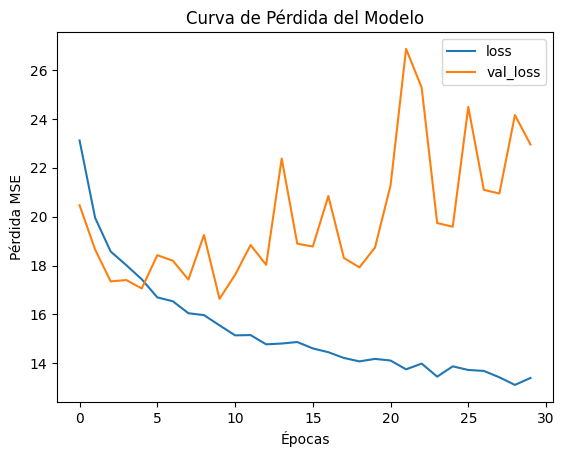

In [56]:
# Opcional: Visualizar la curva de pérdida


plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Curva de Pérdida del Modelo')
plt.xlabel('Épocas')
plt.ylabel('Pérdida MSE')
plt.legend()
plt.show()

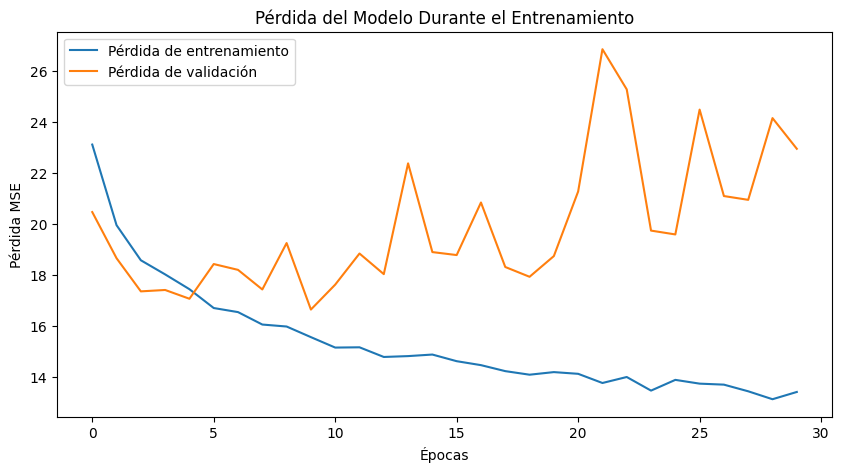

In [57]:


# Suponiendo que 'history' es el resultado devuelto por model.fit()
plt.figure(figsize=(10, 5))

# Graficar la pérdida de entrenamiento
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')

# Graficar la pérdida de validación
plt.plot(history.history['val_loss'], label='Pérdida de validación')

plt.title('Pérdida del Modelo Durante el Entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Pérdida MSE')
plt.legend()

plt.show()


In [58]:
obtener_ultimo_precio = pd.read_csv('df_merged_last_prices.csv')

In [59]:
# Carga del dataframe
df_merged_last_prices = pd.read_csv('df_merged_last_prices.csv')  # Cambia la ruta al archivo correcto

# Asumiendo que la fecha de inicio es proporcionada, por ejemplo:
start_date = datetime.strptime('2024-05-02', '%Y-%m-%d')

# Lista de todos los productos a predecir
product_ids = df_merged_last_prices['ID_producto'].unique()


In [60]:


def generate_features(start_date, df_prices, product_ids):
    dates = [start_date + timedelta(days=x) for x in range(150)]
    results = []

    for product_id in product_ids:
        for date in dates:
            # Buscar el precio más reciente y la promoción para el producto en la fecha específica
            df_filtered = df_prices[df_prices['ID_producto'] == product_id]
            df_filtered = df_filtered[df_filtered['Fecha_venta'] <= date.strftime('%Y-%m-%d')]
            last_record = df_filtered.sort_values('Fecha_venta', ascending=False).head(1)
            
            if not last_record.empty:
                precio = last_record['Precio_unidad'].values[0]
                promocion = last_record['Promocion'].values[0]
                results.append({
                    'Fecha_venta': date,
                    'ID_producto': product_id,
                    
                    'Precio_unidad': precio,
                    'Dia_sem': date.strftime('%A'),
                    'Promocion': promocion,
                    'Año': date.year,
                    'Mes': date.month,
                    'Dia_del_Mes': date.day
                })
            else:
                # Si no hay registros, suponer precio y promoción por defecto
                results.append({
                    'Fecha_venta': date,
                    'ID_producto': product_id,
                    
                    'Precio_unidad': 0,  # O algún valor por defecto
                    'Dia_sem': date.strftime('%A'),
                    'Promocion': 'No',
                    'Año': date.year,
                    'Mes': date.month,
                    'Dia_del_Mes': date.day
                })

    df_features = pd.DataFrame(results)
    df_features.set_index('Fecha_venta', inplace=True)  # Establecer Fecha_venta como índice
    return df_features

# Asumiendo que las variables start_date, df_merged_last_prices y product_ids ya están definidas:
df_features = generate_features(start_date, df_merged_last_prices, product_ids)


In [61]:
df_features
# Exporta el DataFrame a CSV
#df_features.to_csv('df_features.csv', index=False)

,ID_producto,Precio_unidad,Dia_sem,Promocion,Año,Mes,Dia_del_Mes
Fecha_venta,,,,,,,
2024-05-02,562590,1145.0,Thursday,No,2024,5,2
2024-05-03,562590,1145.0,Friday,No,2024,5,3
2024-05-04,562590,1145.0,Saturday,No,2024,5,4
2024-05-05,562590,1145.0,Sunday,No,2024,5,5
2024-05-06,562590,1145.0,Monday,No,2024,5,6
...,...,...,...,...,...,...,...
2024-09-24,560616,810.0,Tuesday,Si,2024,9,24
2024-09-25,560616,810.0,Wednesday,Si,2024,9,25
2024-09-26,560616,810.0,Thursday,Si,2024,9,26


In [62]:
df_features.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 139200 entries, 2024-05-02 to 2024-09-28
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   ID_producto    139200 non-null  int64  
 1   Precio_unidad  139200 non-null  float64
 2   Dia_sem        139200 non-null  object 
 3   Promocion      139200 non-null  object 
 4   Año            139200 non-null  int64  
 5   Mes            139200 non-null  int64  
 6   Dia_del_Mes    139200 non-null  int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 8.5+ MB


In [63]:
# Suponiendo que df_features es tu DataFrame

def transform_days_to_spanish(df):
    # Diccionario para convertir días de la semana del inglés al español
    days_in_spanish = {
        'Monday': 'Lunes',
        'Tuesday': 'Martes',
        'Wednesday': 'Miércoles',
        'Thursday': 'Jueves',
        'Friday': 'Viernes',
        'Saturday': 'Sábado',
        'Sunday': 'Domingo'
    }
    df['Dia_sem'] = df['Dia_sem'].map(days_in_spanish)
    return df

# Transformar los días de la semana al español antes de la codificación
df_features_spanish = transform_days_to_spanish(df_features)


In [64]:
df_features['Año'] = df_features['Año'].astype('category')
df_features['Mes'] = df_features['Mes'].astype('category')
df_features['Dia_del_Mes'] = df_features['Dia_del_Mes'].astype('category')
df_features['ID_producto'] = df_features['ID_producto'].astype('category')
df_features['Dia_sem'] = df_features['Dia_sem'].astype('category')
df_features['Promocion'] = df_features['Promocion'].astype('category')

In [65]:
# Utilizar los transformadores ajustados para transformar los nuevos datos
df_encoded = pd.DataFrame(encoder.transform(df_features[['Dia_sem', 'Promocion', 'Dia_del_Mes', 'Año', 'Mes', 'ID_producto']]), columns=encoder.get_feature_names_out())
df_scaled = pd.DataFrame(scaler.transform(df_features[['Precio_unidad']]), columns=['Precio_unidad'])

In [66]:
# Combinar las características codificadas y escaladas
X_pred = pd.concat([df_encoded, df_scaled], axis=1)

# Hacer predicciones
predictions = model.predict(X_pred)
df_features['Predicciones'] = predictions

4350/4350 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step


In [67]:
print(df_features.columns)


Index(['ID_producto', 'Precio_unidad', 'Dia_sem', 'Promocion', 'Año', 'Mes',
       'Dia_del_Mes', 'Predicciones'],
      dtype='object')


In [68]:
df_features

,ID_producto,Precio_unidad,Dia_sem,Promocion,Año,Mes,Dia_del_Mes,Predicciones
Fecha_venta,,,,,,,,
2024-05-02,562590,1145.0,Jueves,No,2024,5,2,2.319833
2024-05-03,562590,1145.0,Viernes,No,2024,5,3,2.173033
2024-05-04,562590,1145.0,Sábado,No,2024,5,4,1.634449
2024-05-05,562590,1145.0,Domingo,No,2024,5,5,2.336935
2024-05-06,562590,1145.0,Lunes,No,2024,5,6,2.686800
...,...,...,...,...,...,...,...,...
2024-09-24,560616,810.0,Martes,Si,2024,9,24,1.762924
2024-09-25,560616,810.0,Miércoles,Si,2024,9,25,1.733542
2024-09-26,560616,810.0,Jueves,Si,2024,9,26,1.920192


In [69]:
df_features.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 139200 entries, 2024-05-02 to 2024-09-28
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype   
---  ------         --------------   -----   
 0   ID_producto    139200 non-null  category
 1   Precio_unidad  139200 non-null  float64 
 2   Dia_sem        139200 non-null  category
 3   Promocion      139200 non-null  category
 4   Año            139200 non-null  category
 5   Mes            139200 non-null  category
 6   Dia_del_Mes    139200 non-null  category
 7   Predicciones   139200 non-null  float32 
dtypes: category(6), float32(1), float64(1)
memory usage: 3.6 MB


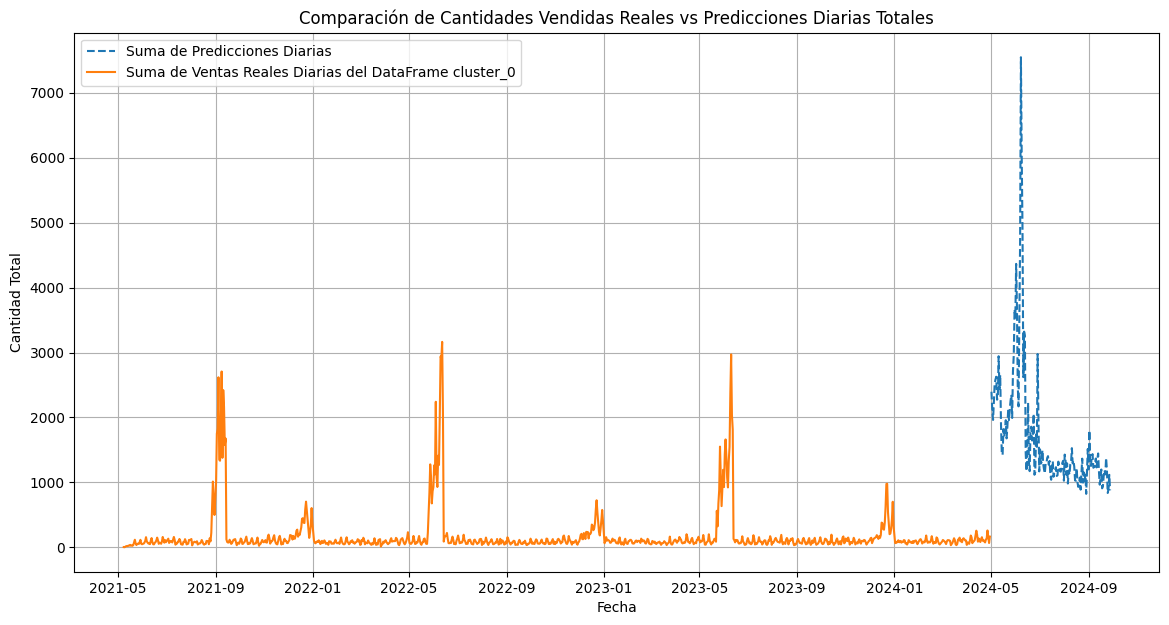

In [70]:
# Sumarizar las predicciones y las ventas reales por fecha
predicciones_diarias = df_features.groupby(df_features.index)['Predicciones'].sum()
ventas_reales_diarias = cluster_0.groupby(cluster_0.index)['Cant_vendidas'].sum()

# Asegurar que las fechas de ambos DataFrames están alineadas
predicciones_diarias = predicciones_diarias.sort_index()
ventas_reales_diarias = ventas_reales_diarias.sort_index()

# Crear un gráfico de líneas para comparar las sumas diarias
plt.figure(figsize=(14, 7))
plt.plot(predicciones_diarias.index, predicciones_diarias, label='Suma de Predicciones Diarias', linestyle='--')
plt.plot(ventas_reales_diarias.index, ventas_reales_diarias, label='Suma de Ventas Reales Diarias del DataFrame cluster_0')

plt.title('Comparación de Cantidades Vendidas Reales vs Predicciones Diarias Totales')
plt.xlabel('Fecha')
plt.ylabel('Cantidad Total')
plt.legend()
plt.grid(True)
plt.show()
